<a href="https://colab.research.google.com/github/vishilp/dsbmed205/blob/main/PS2/ps2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
from sklearn import linear_model
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

In [50]:
#question 1
with open("/content/Q1.training.geno", "r") as file: #split the genotypes correctly (since there's no space in between them)
    matrix = [list(line.strip()) for line in file]
X_train = np.array(matrix, dtype=int)
Y_train = np.loadtxt('/content/Q1.training.pheno')
X_train.shape

(1000, 900)

In [51]:
X_train = X_train.T#sklearn expects samples x features, the reverse of our data (samples as rows, features as cols)
X_train.shape

(900, 1000)

In [52]:
model1 = linear_model.LinearRegression()
model1.fit(X_train,Y_train)

LinearRegression()

In [64]:
#now, we need to test our test inputs, and compare the predicted ouptut to actual test outputs
with open("/content/Q1.test.geno", "r") as file:
    matrix = [list(line.strip()) for line in file]
X_test = np.array(matrix, dtype=int)
Y_test = np.loadtxt('/content/Q1.test.pheno')
X_test = X_test.T

#predict on test data
Y_test_pred = model1.predict(X_test)

# Calculate MSE (difference between true values and predicted values)
mse_ols = mean_squared_error(Y_test, Y_test_pred)

# Plot the MSE values
mse_ols

316.3827452752966

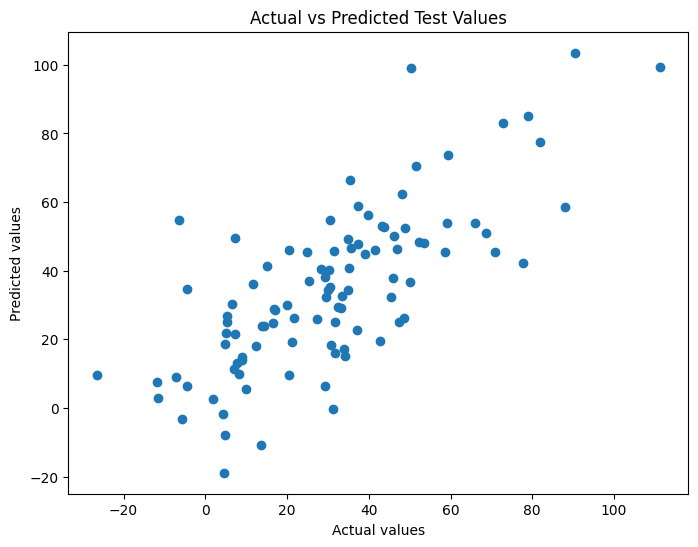

In [65]:
# Plot actual vs predicted values
plt.figure(figsize=(8,6))
plt.scatter(Y_test, Y_test_pred)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted Test Values')
plt.show()


In [66]:
#just a quick check to see what mse would be if we try to invert a non-invertible matrix
def ols(X_train, Y_train, X_test, Y_test):
    # Add a column of ones for the intercept
    X_train = np.column_stack([np.ones(X_train.shape[0]), X_train])

    # OLS formula: (X^T X)^(-1) X^T y
    beta = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ Y_train
    # Make predictions on the test set
    X_test = np.column_stack([np.ones(X_test.shape[0]), X_test])  # Add a column of ones for the intercept
    Y_pred = X_test @ beta  # Predicted values
    mse_ols = mean_squared_error(Y_test, Y_pred)
    mse_ols
    return mse_ols

mse_no_library = ols(X_train, Y_train, X_test, Y_test)
mse_no_library

97641047.69760239

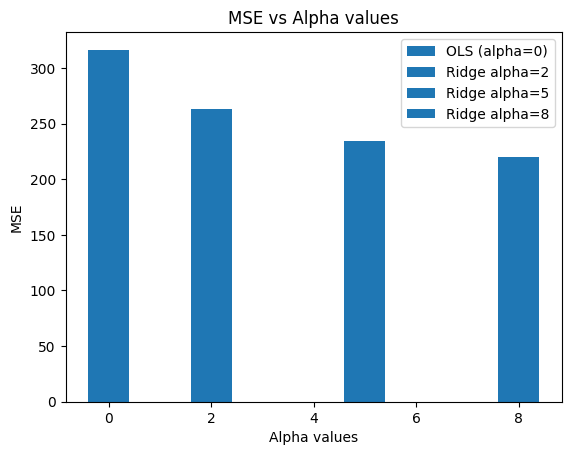

In [67]:
ridge2 = linear_model.Ridge(alpha = 2)
ridge2.fit(X_train,Y_train)
ridge5 = linear_model.Ridge(alpha = 5)
ridge5.fit(X_train,Y_train)
ridge8 = linear_model.Ridge(alpha = 8)
ridge8.fit(X_train,Y_train)

Y_test_pred_ridge2 = ridge2.predict(X_test)
Y_test_pred_ridge5 = ridge5.predict(X_test)
Y_test_pred_ridge8 = ridge8.predict(X_test)
mse_ridge2 = mean_squared_error(Y_test, Y_test_pred_ridge2)
mse_ridge5 = mean_squared_error(Y_test, Y_test_pred_ridge5)
mse_right8 = mean_squared_error(Y_test, Y_test_pred_ridge8)


plt.bar([0,2,5,8],[mse_ols, mse_ridge2, mse_ridge5, mse_right8], label=['OLS (alpha=0)', 'Ridge alpha=2', 'Ridge alpha=5', 'Ridge alpha=8'])
plt.legend()
plt.xlabel('Alpha values')
plt.ylabel('MSE')
plt.title('MSE vs Alpha values')
plt.show()

In [68]:
#Question 2
Y = np.loadtxt('/content/hw.2-1.pheno')
with open("/content/hw.2-1.geno", "r") as file: #split the genotypes correctly (since there's no space in between them)
    matrix = [list(line.strip()) for line in file]
X = np.array(matrix, dtype=int)
X.shape

(10, 1000)

In [69]:
X= X.T #sklearn expects samples x features, the reverse of our data (samples as rows, features as cols)
X.shape

(1000, 10)

In [70]:
logr = linear_model.LogisticRegression() #let's test to see what our SNP coefficients would be if we use a built in library
logr.fit(X,Y)

LogisticRegression()

In [71]:
logr.coef_

array([[-0.27872114, -0.84318054,  0.35041156, -3.25821712, -1.20820293,
         1.33834649,  0.70465031,  0.72807921, -0.25812879,  2.16692897]])

In [72]:
logr.intercept_

array([-1.01474899])

In [73]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

X = np.hstack((np.ones((X.shape[0], 1)), X)) #augment a 1 to the design matrix so that we can have the intercept term in the beta vector
beta = np.zeros((11))

# Gradient Descent
def gradient_descent(X, Y, Beta, alpha, num_iters):
  nllvals = []
  for i in range(num_iters):
    h = sigmoid(X @ Beta) # @ is mat multiplication
    gradient = -((Y-h) @ X)  # Compute gradient
    Beta -= alpha * gradient  # Update parameters
    epsilon = 1e-10  # Small constant to prevent log(0)
    nll =  -(Y @ np.log(h + epsilon) + (1 - Y) @ np.log(1 - h + epsilon))
    nllvals.append(nll)
  return nllvals

X.shape

(1000, 11)

In [74]:
beta = np.zeros((11))
nllvals = gradient_descent(X, Y, beta, 0.1, 50)
beta = np.zeros((11))
nllvals2 = gradient_descent(X, Y, beta, 0.01, 50)
beta = np.zeros((11))
nllvals3 = gradient_descent(X, Y, beta, 0.001, 50)
beta = np.zeros((11))
nllvals4 = gradient_descent(X, Y, beta, 0.0001, 50)
beta = np.zeros((11))
nllvals5 = gradient_descent(X, Y, beta, 0.00001, 50)

<ipython-input-73-afb6f16e4e9c>:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


In [75]:
#newtons method
def newtons_method(X, Y, Beta, num_iters):
  nllvals = []
  for i in range(num_iters):
    h = sigmoid(X @ Beta) # @ is mat
    gradient = -((Y-h) @ X)  # Compute gradient
    hessian = X.T @ np.diag(h * (1 - h)) @ X  # Compute Hessian
    Beta -=  np.linalg.inv(hessian) @ gradient  # Update
    nll =  -(Y @ np.log(h) + (1 - Y) @ np.log(1 - h ))
    nllvals.append(nll)
  return nllvals
beta = np.zeros((11))
newton = newtons_method(X, Y, beta, 50)

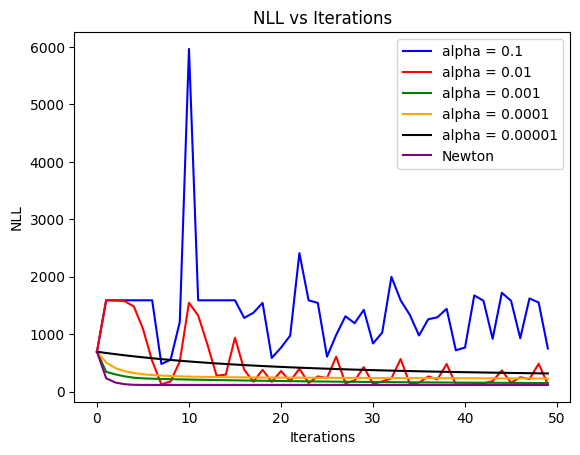

In [76]:
plt.plot(range(50), nllvals, color = 'blue', label = 'alpha = 0.1')
plt.plot(range(50), nllvals2, color = 'red', label = 'alpha = 0.01')
plt.plot(range(50), nllvals3, color = 'green', label = 'alpha = 0.001')
plt.plot(range(50), nllvals4, color = 'orange', label = 'alpha = 0.0001')
plt.plot(range(50), nllvals5, color = 'black', label = 'alpha = 0.00001')
plt.plot(range(50), newton, color = 'purple', label = 'Newton')
plt.xlabel('Iterations')
plt.ylabel('NLL')
plt.title('NLL vs Iterations')
plt.legend()
plt.show()

In [77]:
#now do newtons method to compute beta values for snp 1 and 7
beta = np.zeros((11))
def newtons_method2(X, Y, Beta, num_iters):
  betavals = [Beta]
  for i in range(num_iters):
    h = sigmoid(X @ Beta) # @ is mat
    gradient = -((Y-h) @ X)  # Compute gradient
    hessian = X.T @ np.diag(h * (1 - h)) @ X  # Compute Hessian
    Beta -=  np.linalg.inv(hessian) @ gradient  # Update
    betavals.append(Beta)
  return betavals
betavals = newtons_method2(X, Y, beta, 50)
betavals

[array([-1.08829203, -0.37384797, -1.13491579,  0.42497759, -4.05613268,
        -1.51912633,  1.78318426,  0.88481878,  0.90405008, -0.28837103,
         2.72239616]),
 array([-1.08829203, -0.37384797, -1.13491579,  0.42497759, -4.05613268,
        -1.51912633,  1.78318426,  0.88481878,  0.90405008, -0.28837103,
         2.72239616]),
 array([-1.08829203, -0.37384797, -1.13491579,  0.42497759, -4.05613268,
        -1.51912633,  1.78318426,  0.88481878,  0.90405008, -0.28837103,
         2.72239616]),
 array([-1.08829203, -0.37384797, -1.13491579,  0.42497759, -4.05613268,
        -1.51912633,  1.78318426,  0.88481878,  0.90405008, -0.28837103,
         2.72239616]),
 array([-1.08829203, -0.37384797, -1.13491579,  0.42497759, -4.05613268,
        -1.51912633,  1.78318426,  0.88481878,  0.90405008, -0.28837103,
         2.72239616]),
 array([-1.08829203, -0.37384797, -1.13491579,  0.42497759, -4.05613268,
        -1.51912633,  1.78318426,  0.88481878,  0.90405008, -0.28837103,
         

In [78]:
#Question 3
Y2 = np.loadtxt('/content/hw.2-2.pheno')
with open("/content/hw.2-2.geno", "r") as file: #split the genotypes correctly (since there's no space in between them)
    matrix = [list(line.strip()) for line in file]
X2 = np.array(matrix, dtype=int)
X2 = X2.T
X2.shape

(500, 382)

In [79]:
linmodel = linear_model.LinearRegression()
linmodel.fit(X2,Y2)

LinearRegression()

In [80]:
linmodel.coef_.shape #each row is a phenotype, each column a SNP

(4, 382)

In [81]:
linmodel.intercept_

array([1.68547001e+00, 1.34708749e+00, 6.78925020e+00, 5.73802724e+07])

In [82]:
import statsmodels.api as sm
#reject null at anything below controlled FWER
siglevel = 0.05/382

#we're running a model for every snp phenotype pair (382x4)

results = {}
for pheno in range(Y2.shape[1]):
  phenotype = Y2[:,pheno]
  pvals=[]
  for genotype in range(X2.shape[1]):
    snp = X2[:, genotype]
    X3 = sm.add_constant(snp) #add an intercept, statsmodel doesn't have one by default
    model = sm.OLS(phenotype, X3).fit()
    pvals.append(model.pvalues[1])
  results[pheno + 1] = pvals

In [84]:
snps={}
for i in range(len(results)):
  snps[i+1] = []
  for j in range(len(results[i+1])):
    if results[i+1][j] < siglevel:
      snps[i+1].append(j+1)

In [86]:
snps #snps to reject

{1: [], 2: [258], 3: [119], 4: [43]}

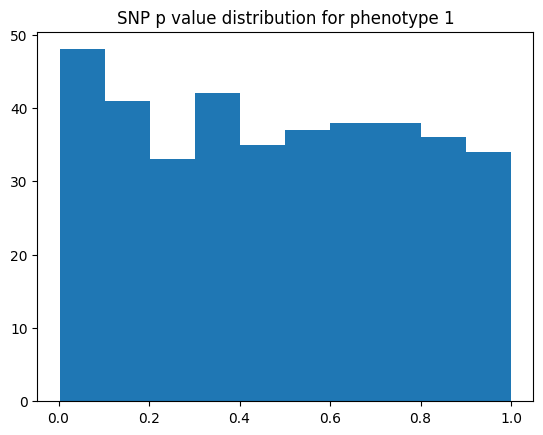

In [87]:
#now, let's check the SNP p value distribution for every phenotype
plt.hist(results[1])
plt.title("SNP p value distribution for phenotype 1")
plt.show()

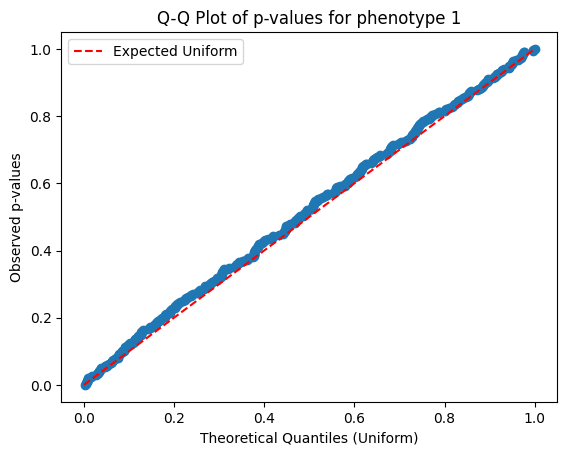

In [88]:
p_values_sorted = np.sort(results[1])  # Sort the p-values
expected = np.linspace(0, 1, len(p_values_sorted))  # Expected uniform distribution
plt.scatter(p_values_sorted, expected)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label="Expected Uniform")  # Reference line
plt.xlabel("Theoretical Quantiles (Uniform)")
plt.ylabel("Observed p-values")
plt.title("Q-Q Plot of p-values for phenotype 1")
plt.legend()
plt.show()

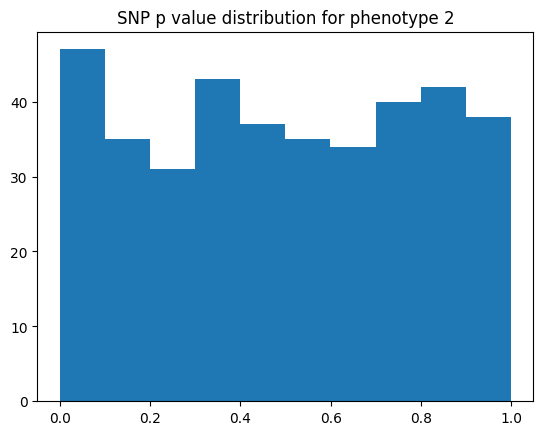

In [90]:
plt.hist(results[2])
plt.title("SNP p value distribution for phenotype 2")
plt.show()

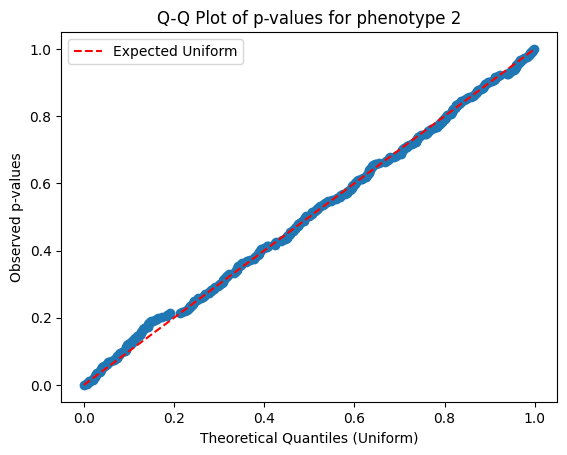

In [91]:
p_values_sorted = np.sort(results[2])  # Sort the p-values
expected = np.linspace(0, 1, len(p_values_sorted))  # Expected uniform distribution
plt.scatter(p_values_sorted, expected)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label="Expected Uniform")  # Reference line
plt.xlabel("Theoretical Quantiles (Uniform)")
plt.ylabel("Observed p-values")
plt.title("Q-Q Plot of p-values for phenotype 2")
plt.legend()
plt.show()

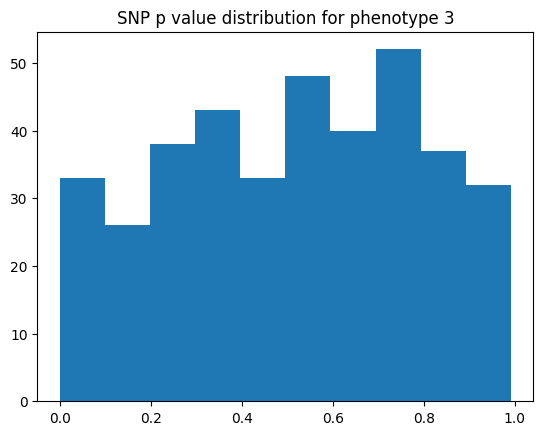

In [92]:
plt.hist(results[3])
plt.title("SNP p value distribution for phenotype 3")
plt.show()

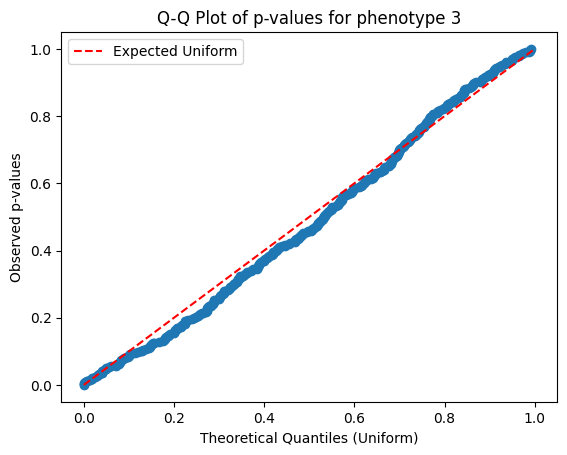

In [93]:
p_values_sorted = np.sort(results[3])  # Sort the p-values
expected = np.linspace(0, 1, len(p_values_sorted))  # Expected uniform distribution
plt.scatter(p_values_sorted, expected)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label="Expected Uniform")  # Reference line
plt.xlabel("Theoretical Quantiles (Uniform)")
plt.ylabel("Observed p-values")
plt.title("Q-Q Plot of p-values for phenotype 3")
plt.legend()
plt.show()

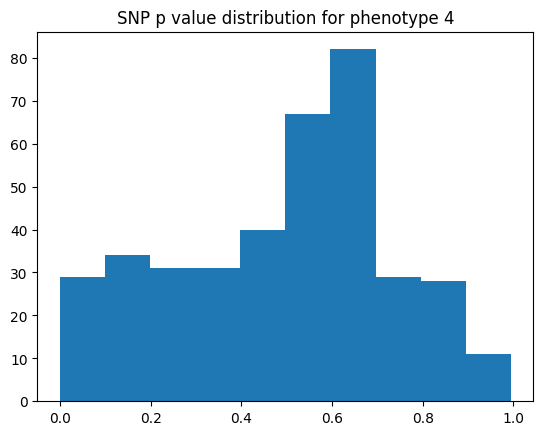

In [94]:
plt.hist(results[4])
plt.title("SNP p value distribution for phenotype 4")
plt.show()

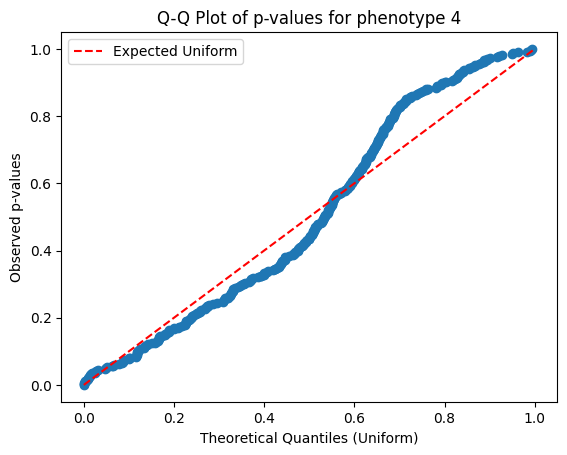

In [95]:
p_values_sorted = np.sort(results[4])  # Sort the p-values
expected = np.linspace(0, 1, len(p_values_sorted))  # Expected uniform distribution
plt.scatter(p_values_sorted, expected)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label="Expected Uniform")  # Reference line
plt.xlabel("Theoretical Quantiles (Uniform)")
plt.ylabel("Observed p-values")
plt.title("Q-Q Plot of p-values for phenotype 4")
plt.legend()
plt.show()

<ipython-input-101-ca5d0a6c32de>:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([pheno2_genotype0, pheno2_genotype1, pheno2_genotype2], labels=['Genotype 0', 'Genotype 1', 'Genotype 2'])


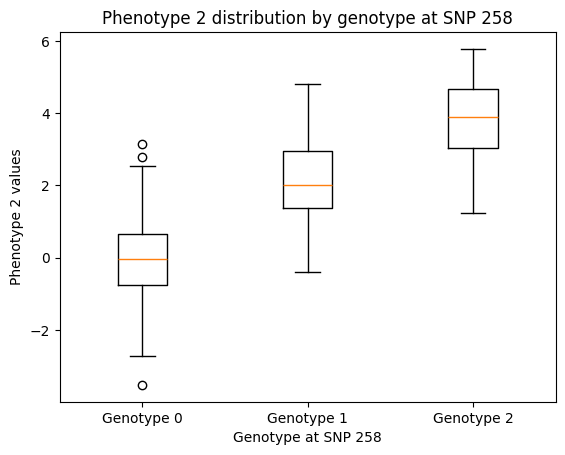

In [101]:
snp258 = X2[:, 257]
pheno2 = Y2[:,1]
# Group phenotype data based on genotype at SNP 258
pheno2_genotype0 = pheno2[snp258 == 0]  # Phenotype values for genotype 0
pheno2_genotype1 = pheno2[snp258 == 1]  # Phenotype values for genotype 1
pheno2_genotype2 = pheno2[snp258 == 2]  # Phenotype values for genotype 2

plt.boxplot([pheno2_genotype0, pheno2_genotype1, pheno2_genotype2], labels=['Genotype 0', 'Genotype 1', 'Genotype 2'])
plt.title("Phenotype 2 distribution by genotype at SNP 258")
plt.ylabel("Phenotype 2 values")
plt.xlabel("Genotype at SNP 258")
plt.show()

<ipython-input-102-1b010d53e22f>:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([pheno3_genotype0, pheno3_genotype1, pheno3_genotype2], labels=['Genotype 0', 'Genotype 1', 'Genotype 2'])


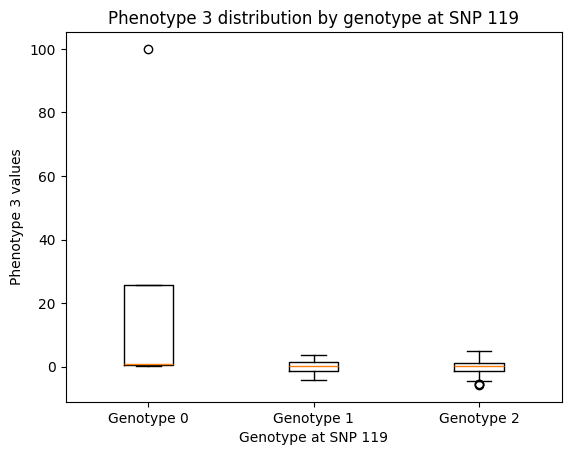

In [102]:
snp119 = X2[:, 118]
pheno3 = Y2[:,2]
pheno3_genotype0 = pheno3[snp119 == 0]  # Phenotype values for genotype 0
pheno3_genotype1 = pheno3[snp119 == 1]  # Phenotype values for genotype 1
pheno3_genotype2 = pheno3[snp119 == 2]  # Phenotype values for genotype 2

plt.boxplot([pheno3_genotype0, pheno3_genotype1, pheno3_genotype2], labels=['Genotype 0', 'Genotype 1', 'Genotype 2'])
plt.title("Phenotype 3 distribution by genotype at SNP 119")
plt.ylabel("Phenotype 3 values")
plt.xlabel("Genotype at SNP 119")
plt.show()

<ipython-input-103-1bfd869b674b>:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([pheno4_genotype0, pheno4_genotype1, pheno4_genotype2], labels=['Genotype 0', 'Genotype 1', 'Genotype 2'])


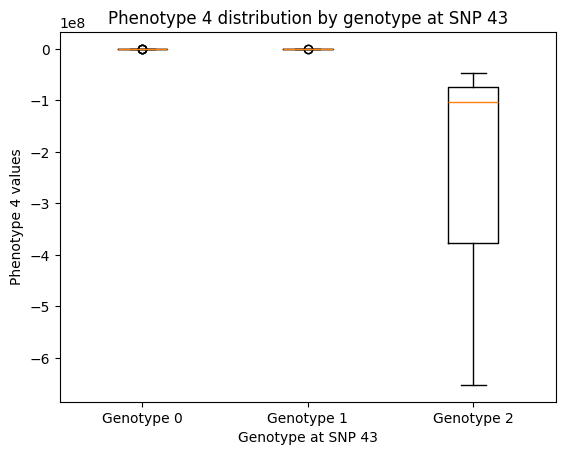

In [103]:
snp43 = X2[:, 42]
pheno4 = Y2[:,3]
# Group phenotype data based on genotype at SNP 258
pheno4_genotype0 = pheno4[snp43 == 0]  # Phenotype values for genotype 0
pheno4_genotype1 = pheno4[snp43 == 1]  # Phenotype values for genotype 1
pheno4_genotype2 = pheno4[snp43 == 2]  # Phenotype values for genotype 2

plt.boxplot([pheno4_genotype0, pheno4_genotype1, pheno4_genotype2], labels=['Genotype 0', 'Genotype 1', 'Genotype 2'])
plt.title("Phenotype 4 distribution by genotype at SNP 43")
plt.ylabel("Phenotype 4 values")
plt.xlabel("Genotype at SNP 43")
plt.show()